### 1.Inspiration /Problem Statement:The goal is to predict whether a person makes over $50K a year.

#### Importing Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import pandas_profiling as pp
import plotly.express as px
sn.set()
RANDOM_SEED = 42

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

from subprocess import check_output
from sklearn import metrics
import joblib
import pickle
import time
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import RobustScaler

In [2]:
import os
for dirname, _, filenames in os.walk('/Users/Zahed/Census Income Project'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/Users/Zahed/Census Income Project\census_income.csv


### 2. Data Loading and Description

#### Importing Dataset

In [3]:
data = '/Users/Zahed/Census Income Project\census_income.csv'
df = pd.read_csv(data)

In [4]:
# settings to display all columns
pd.set_option("display.max_columns", None)
df.head()

Age          Workclass  Fnlwgt   Education  Education_num  \
0   50   Self-emp-not-inc   83311   Bachelors             13   
1   38            Private  215646     HS-grad              9   
2   53            Private  234721        11th              7   
3   28            Private  338409   Bachelors             13   
4   37            Private  284582     Masters             14   

        Marital_status          Occupation    Relationship    Race      Sex  \
0   Married-civ-spouse     Exec-managerial         Husband   White     Male   
1             Divorced   Handlers-cleaners   Not-in-family   White     Male   
2   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
3   Married-civ-spouse      Prof-specialty            Wife   Black   Female   
4   Married-civ-spouse     Exec-managerial            Wife   White   Female   

   Capital_gain  Capital_loss  Hours_per_week  Native_country  Income  
0             0             0              13   United-States   <=50K  
1             0             0              40   United-States   <=50K  
2             0             0              40   United-States   <=50K  
3             0             0              40            Cuba   <=50K  
4             0             0              40   United-States   <=50K

In [5]:
#Having a copy of Original Data Frame for Future Analysis Purpose
new_df = df.copy()
new_df.head(50)

Age          Workclass  Fnlwgt      Education  Education_num  \
0    50   Self-emp-not-inc   83311      Bachelors             13   
1    38            Private  215646        HS-grad              9   
2    53            Private  234721           11th              7   
3    28            Private  338409      Bachelors             13   
4    37            Private  284582        Masters             14   
5    49            Private  160187            9th              5   
6    52   Self-emp-not-inc  209642        HS-grad              9   
7    31            Private   45781        Masters             14   
8    42            Private  159449      Bachelors             13   
9    37            Private  280464   Some-college             10   
10   30          State-gov  141297      Bachelors             13   
11   23            Private  122272      Bachelors             13   
12   32            Private  205019     Assoc-acdm             12   
13   40            Private  121772      Assoc-voc             11   
14   34            Private  245487        7th-8th              4   
15   25   Self-emp-not-inc  176756        HS-grad              9   
16   32            Private  186824        HS-grad              9   
17   38            Private   28887           11th              7   
18   43   Self-emp-not-inc  292175        Masters             14   
19   40            Private  193524      Doctorate             16   
20   54            Private  302146        HS-grad              9   
21   35        Federal-gov   76845            9th              5   
22   43            Private  117037           11th              7   
23   59            Private  109015        HS-grad              9   
24   56          Local-gov  216851      Bachelors             13   
25   19            Private  168294        HS-grad              9   
26   54                  ?  180211   Some-college             10   
27   39            Private  367260        HS-grad              9   
28   49            Private  193366        HS-grad              9   
29   23          Local-gov  190709     Assoc-acdm             12   
30   20            Private  266015   Some-college             10   
31   45            Private  386940      Bachelors             13   
32   30        Federal-gov   59951   Some-college             10   
33   22          State-gov  311512   Some-college             10   
34   48            Private  242406           11th              7   
35   21            Private  197200   Some-college             10   
36   19            Private  544091        HS-grad              9   
37   31            Private   84154   Some-college             10   
38   48   Self-emp-not-inc  265477     Assoc-acdm             12   
39   31            Private  507875            9th              5   
40   53   Self-emp-not-inc   88506      Bachelors             13   
41   24            Private  172987      Bachelors             13   
42   49            Private   94638        HS-grad              9   
43   25            Private  289980        HS-grad              9   
44   57        Federal-gov  337895      Bachelors             13   
45   53            Private  144361        HS-grad              9   
46   44            Private  128354        Masters             14   
47   41          State-gov  101603      Assoc-voc             11   
48   29            Private  271466      Assoc-voc             11   
49   25            Private   32275   Some-college             10   

            Marital_status          Occupation    Relationship  \
0       Married-civ-spouse     Exec-managerial         Husband   
1                 Divorced   Handlers-cleaners   Not-in-family   
2       Married-civ-spouse   Handlers-cleaners         Husband   
3       Married-civ-spouse      Prof-specialty            Wife   
4       Married-civ-spouse     Exec-managerial            Wife   
5    Married-spouse-absent       Other-service   Not-in-family   
6       Married-civ-spouse     Exec-managerial         Husband   
7      

#### Dimensionality Check

In [6]:
df.shape

(32560, 15)

#####   Observation:The dataset consist of 32560 observations of 15 columns.

In [7]:
#Getting the datatypes of the columns
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

#### Variables/Features of the Dataset

In [8]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

### 3.Preprocessing data

* Checking Missing Values
* Checking class imbalancement
* Displaying data types and their Unique values.
* Dropping insignigicant columns with less or no usefull data in it
* Transforming Data/Converting Categorical Columns into Numerical Column
* Feature Engineering

In [9]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [10]:
df.isnull().values.any()

False

#### Observation:There are no Missing Values in any of the columns in dataset

In [11]:
df.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

In [12]:
df.describe().T

count           mean            std      min       25%  \
Age             32560.0      38.581634      13.640642     17.0      28.0   
Fnlwgt          32560.0  189781.814373  105549.764924  12285.0  117831.5   
Education_num   32560.0      10.080590       2.572709      1.0       9.0   
Capital_gain    32560.0    1077.615172    7385.402999      0.0       0.0   
Capital_loss    32560.0      87.306511     402.966116      0.0       0.0   
Hours_per_week  32560.0      40.437469      12.347618      1.0      40.0   

                     50%       75%        max  
Age                 37.0      48.0       90.0  
Fnlwgt          178363.0  237054.5  1484705.0  
Education_num       10.0      12.0       16.0  
Capital_gain         0.0       0.0    99999.0  
Capital_loss         0.0       0.0     4356.0  
Hours_per_week      40.0      45.0       99.0

### Value Count Function

In [13]:
# print all of the data types and their Unique values
for column in df.columns:
    if df[column].dtype == object:
        print(str(column)+ ':'+str(df[column].unique()))
        print(df[column].value_counts())
        print('---------------------------------------------------------------------------------------------')

Workclass:[' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
---------------------------------------------------------------------------------------------
Education:[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413


#### Filling the Questoin_Marks(?) with suitable Values

In [14]:
df['Workclass'] = df['Workclass'].str.replace('?', 'Private')
df['Occupation'] = df['Occupation'].str.replace('?', 'Prof-specialty')
df['Native_country'] = df['Native_country'].str.replace('?', 'United-States')

In [15]:
df.head(30)

Age          Workclass  Fnlwgt      Education  Education_num  \
0    50   Self-emp-not-inc   83311      Bachelors             13   
1    38            Private  215646        HS-grad              9   
2    53            Private  234721           11th              7   
3    28            Private  338409      Bachelors             13   
4    37            Private  284582        Masters             14   
5    49            Private  160187            9th              5   
6    52   Self-emp-not-inc  209642        HS-grad              9   
7    31            Private   45781        Masters             14   
8    42            Private  159449      Bachelors             13   
9    37            Private  280464   Some-college             10   
10   30          State-gov  141297      Bachelors             13   
11   23            Private  122272      Bachelors             13   
12   32            Private  205019     Assoc-acdm             12   
13   40            Private  121772      Assoc-voc             11   
14   34            Private  245487        7th-8th              4   
15   25   Self-emp-not-inc  176756        HS-grad              9   
16   32            Private  186824        HS-grad              9   
17   38            Private   28887           11th              7   
18   43   Self-emp-not-inc  292175        Masters             14   
19   40            Private  193524      Doctorate             16   
20   54            Private  302146        HS-grad              9   
21   35        Federal-gov   76845            9th              5   
22   43            Private  117037           11th              7   
23   59            Private  109015        HS-grad              9   
24   56          Local-gov  216851      Bachelors             13   
25   19            Private  168294        HS-grad              9   
26   54            Private  180211   Some-college             10   
27   39            Private  367260        HS-grad              9   
28   49            Private  193366        HS-grad              9   
29   23          Local-gov  190709     Assoc-acdm             12   

            Marital_status          Occupation    Relationship  \
0       Married-civ-spouse     Exec-managerial         Husband   
1                 Divorced   Handlers-cleaners   Not-in-family   
2       Married-civ-spouse   Handlers-cleaners         Husband   
3       Married-civ-spouse      Prof-specialty            Wife   
4       Married-civ-spouse     Exec-managerial            Wife   
5    Married-spouse-absent       Other-service   Not-in-family   
6       Married-civ-spouse     Exec-managerial         Husband   
7            Never-married      Prof-specialty   Not-in-family   
8       Married-civ-spouse     Exec-managerial         Husband   
9       Married-civ-spouse     Exec-managerial         Husband   
10      Married-civ-spouse      Prof-specialty         Husband   
11           Never-married        Adm-clerical       Own-child   
12           Never-married               Sales   Not-in-family   
13      Married-civ-spouse        Craft-repair         Husband   
14      Married-civ-spouse    Transport-moving         Husband   
15           Never-married     Farming-fishing       Own-child   
16           Never-married   Machine-op-inspct       Unmarried   
17      Married-civ-spouse               Sales         Husband   
18                Divorced     Exec-managerial       Unmarried   
19      Married-civ-spouse      Prof-specialty         Husband   
20               Separated       Other-service       Unmarried   
21      Married-civ-spouse     Farming-fishing         Husband   
22      Married-civ-spouse    Transport-moving         Husband   
23                Divorced        Tech-support       Unmarried   
24      Married-civ-spouse        Tech-support         Husband   
25           Never-married        Craft-repair       Own-child   
26      Married-civ-spouse      Prof-specialty         Husband   
27                Divorced     Exec-managerial 

### Feature Engineering

In [16]:
# Education Category
# 1. School
df['Education'] = df['Education'].str.replace('Preschool','School')
df['Education'] = df['Education'].str.replace('1st-4th','School')
df['Education'] = df['Education'].str.replace('5th-6th','School')
df['Education'] = df['Education'].str.replace('7th-8th','School')
df['Education'] = df['Education'].str.replace('9th','School')
df['Education'] = df['Education'].str.replace('10th','School')
df['Education'] = df['Education'].str.replace('11th','School')
df['Education'] = df['Education'].str.replace('12th','School')

# 2. Higher
df['Education'] = df['Education'].str.replace('Assoc-acdm','Higher')
df['Education'] = df['Education'].str.replace('Some-college','Higher')
df['Education'] = df['Education'].str.replace('Assoc-voc','Higher')
df['Education'] = df['Education'].str.replace('Prof-school','Higher')

# 3. Other
df['Education'] = df['Education'].str.replace('Doctorate', 'doc')
df['Education'] = df['Education'].str.replace('Masters','Graduate')
df['Education'] = df['Education'].str.replace('Bachelors','Under_Graduate')
df['Education'] = df['Education'].str.replace('HS-grad','High_School')



In [17]:
df['Education'].head()

0     Under_Graduate
1        High_School
2             School
3     Under_Graduate
4           Graduate
Name: Education, dtype: object

In [18]:
# Marital Status
# 1. Married
df['Marital_status'] = df['Marital_status'].str.replace('Married-AF-spouse','Married')
df['Marital_status'] = df['Marital_status'].str.replace('Married-civ-spouse','Married')

# 2.Other
df['Marital_status'] = df['Marital_status'].str.replace('Divorced','Other')
df['Marital_status'] = df['Marital_status'].str.replace('Married-spouse-absent','Other')
df['Marital_status'] = df['Marital_status'].str.replace('Separated','Other')
df['Marital_status'] = df['Marital_status'].str.replace('Widowed','Other')

# 3. Not Married
df['Marital_status'] = df['Marital_status'].str.replace('Never-married','Not-Married')

In [19]:
df.head()

Age          Workclass  Fnlwgt        Education  Education_num  \
0   50   Self-emp-not-inc   83311   Under_Graduate             13   
1   38            Private  215646      High_School              9   
2   53            Private  234721           School              7   
3   28            Private  338409   Under_Graduate             13   
4   37            Private  284582         Graduate             14   

  Marital_status          Occupation    Relationship    Race      Sex  \
0        Married     Exec-managerial         Husband   White     Male   
1          Other   Handlers-cleaners   Not-in-family   White     Male   
2        Married   Handlers-cleaners         Husband   Black     Male   
3        Married      Prof-specialty            Wife   Black   Female   
4        Married     Exec-managerial            Wife   White   Female   

   Capital_gain  Capital_loss  Hours_per_week  Native_country  Income  
0             0             0              13   United-States   <=50K  
1             0             0              40   United-States   <=50K  
2             0             0              40   United-States   <=50K  
3             0             0              40            Cuba   <=50K  
4             0             0              40   United-States   <=50K

In [20]:
# Income 
df['Income'] = df['Income'].str.replace('<=50K','0')
df['Income'] = df['Income'].str.replace('>50K','1')

In [21]:
df.head()

Age          Workclass  Fnlwgt        Education  Education_num  \
0   50   Self-emp-not-inc   83311   Under_Graduate             13   
1   38            Private  215646      High_School              9   
2   53            Private  234721           School              7   
3   28            Private  338409   Under_Graduate             13   
4   37            Private  284582         Graduate             14   

  Marital_status          Occupation    Relationship    Race      Sex  \
0        Married     Exec-managerial         Husband   White     Male   
1          Other   Handlers-cleaners   Not-in-family   White     Male   
2        Married   Handlers-cleaners         Husband   Black     Male   
3        Married      Prof-specialty            Wife   Black   Female   
4        Married     Exec-managerial            Wife   White   Female   

   Capital_gain  Capital_loss  Hours_per_week  Native_country Income  
0             0             0              13   United-States      0  
1             0             0              40   United-States      0  
2             0             0              40   United-States      0  
3             0             0              40            Cuba      0  
4             0             0              40   United-States      0

<AxesSubplot:xlabel='Workclass', ylabel='count'>

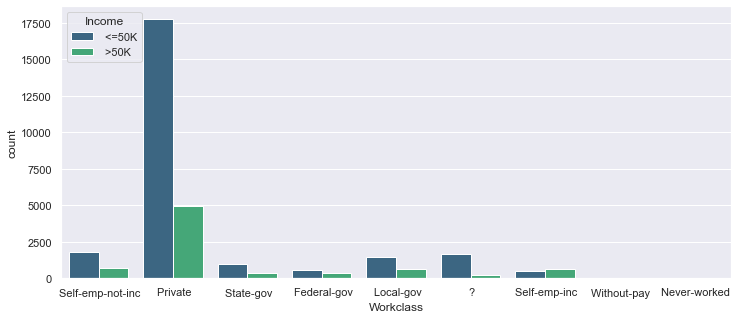

In [22]:
plt.subplots(figsize=(12,5))
sn.countplot(x='Workclass',hue='Income',data=new_df,palette='viridis')

##### Observation: We can see that Most of the private Sector from Work class have Income Above 50K.

<AxesSubplot:xlabel='Education', ylabel='count'>

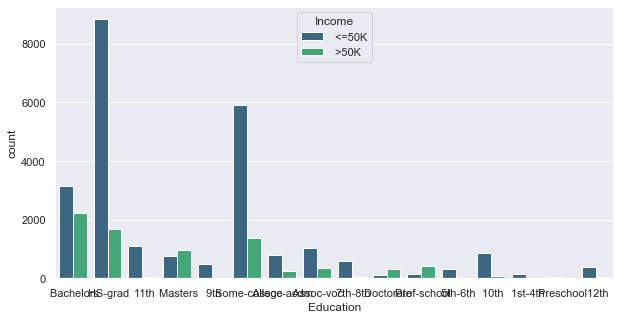

In [23]:
plt.subplots(figsize=(10,5))
sn.countplot(x='Education',hue='Income',data=new_df,palette='viridis')

##### Observation: Under_Grads & those who have Higher Education are ones with Income Above 50K.

<AxesSubplot:xlabel='Marital_status', ylabel='count'>

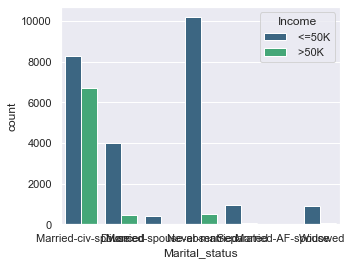

In [24]:
plt.subplots(figsize=(5,4))
sn.countplot(x='Marital_status',hue='Income',data=new_df,palette='viridis')

##### Observation: Married ones are with above 50K Income

<AxesSubplot:xlabel='Sex', ylabel='count'>

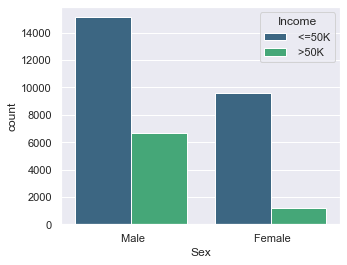

In [25]:
plt.subplots(figsize=(5,4))
sn.countplot(x='Sex',hue='Income',data=new_df,palette='viridis')

##### Observation: Among Gender we can see Males are more in number in terms of Income higher than 50K.

<AxesSubplot:xlabel='Age', ylabel='count'>

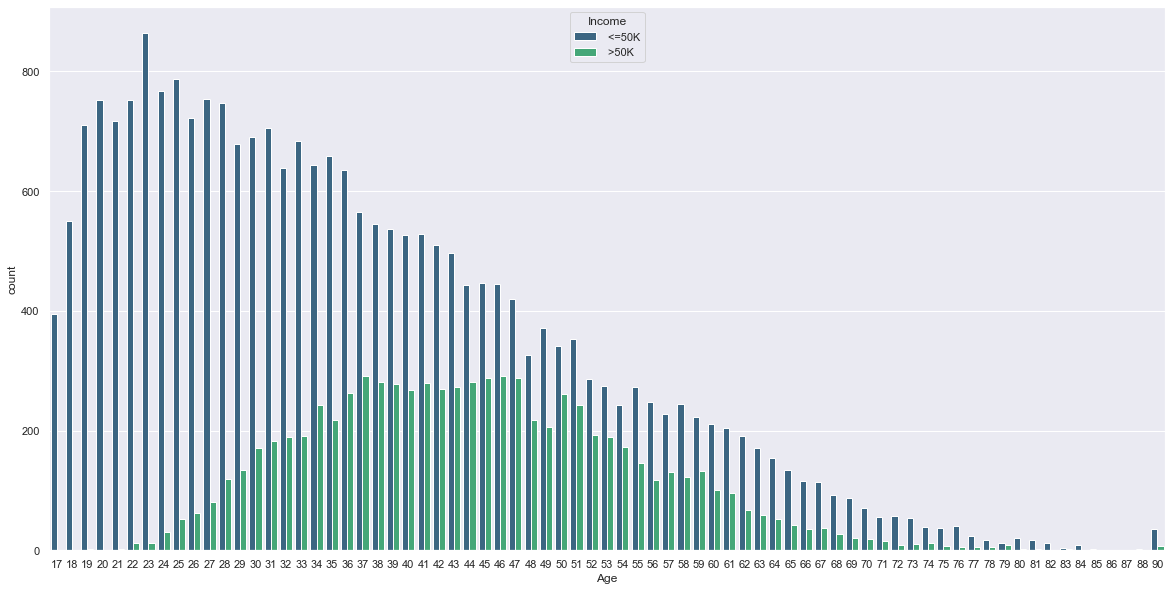

In [26]:
plt.subplots(figsize=(20,10))
sn.countplot(x='Age',hue='Income',data=new_df,palette='viridis')

##### Observation: We can see the number of people with income higher than 50k are seen the highest between the age group 20-34

#### Tranform Data

In [27]:
#Transforming the Non-Numerical Columns into Numerical columns
for column in df.columns:
    if df[column].dtype == np.number:
        continue
    df[column] = LabelEncoder().fit_transform(df[column])

In [28]:
df

Age  Workclass  Fnlwgt  Education  Education_num  Marital_status  \
0       33          5    2925          4             12               0   
1       21          3   14085          1              8               2   
2       36          3   15335          3              6               0   
3       11          3   19354          4             12               0   
4       20          3   17699          0             13               0   
...    ...        ...     ...        ...            ...             ...   
32555   10          3   16527          2             11               0   
32556   23          3    8079          1              8               0   
32557   41          3    7882          1              8               2   
32558    5          3   12880          1              8               1   
32559   35          4   17824          1              8               0   

       Occupation  Relationship  Race  Sex  Capital_gain  Capital_loss  \
0               3             0     4    1             0             0   
1               5             1     4    1             0             0   
2               5             0     2    1             0             0   
3               9             5     2    0             0             0   
4               3             5     4    0             0             0   
...           ...           ...   ...  ...           ...           ...   
32555          12             5     4    0             0             0   
32556           6             0     4    1             0             0   
32557           0             4     4    0             0             0   
32558           0             3     4    1             0             0   
32559           3             5     4    0           108             0   

       Hours_per_week  Native_country  Income  
0                  12              38       0  
1                  39              38       0  
2                  39              38       0  
3                  39               4       0  
4                  39              38       0  
...               ...             ...     ...  
32555              37              38       0  
32556              39              38       1  
32557              39              38       0  
32558              19              38       0  
32559              39              38       1  

[32560 rows x 15 columns]

####  Trying to Establish All the Co-relation between all columns Using HeatMap

In [29]:
#Finding Co relation for all the columns
cor =df.corr()

<AxesSubplot:>

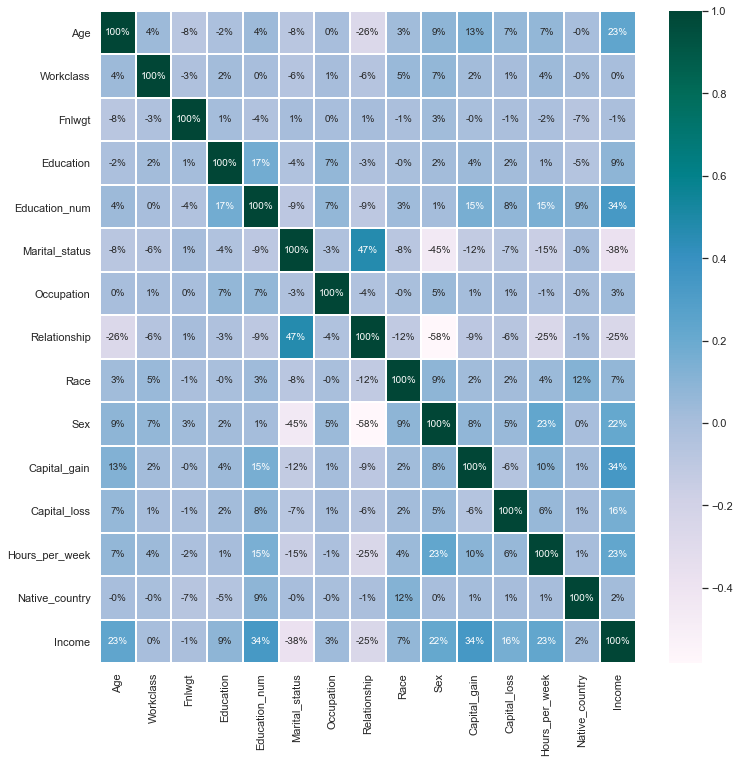

In [30]:
fig_dims = (12, 12)
fig, ax = plt.subplots(figsize=fig_dims)
sn.heatmap(cor,annot=True,linewidths=1,linecolor='white',cmap="PuBuGn",fmt='.0%')

##### Observaion: We can see the above heatmap there is not much co relation among the columns with respect to Income 

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Fnlwgt'}>,
        <AxesSubplot:title={'center':'Education_num'}>],
       [<AxesSubplot:title={'center':'Capital_gain'}>,
        <AxesSubplot:title={'center':'Capital_loss'}>,
        <AxesSubplot:title={'center':'Hours_per_week'}>]], dtype=object)

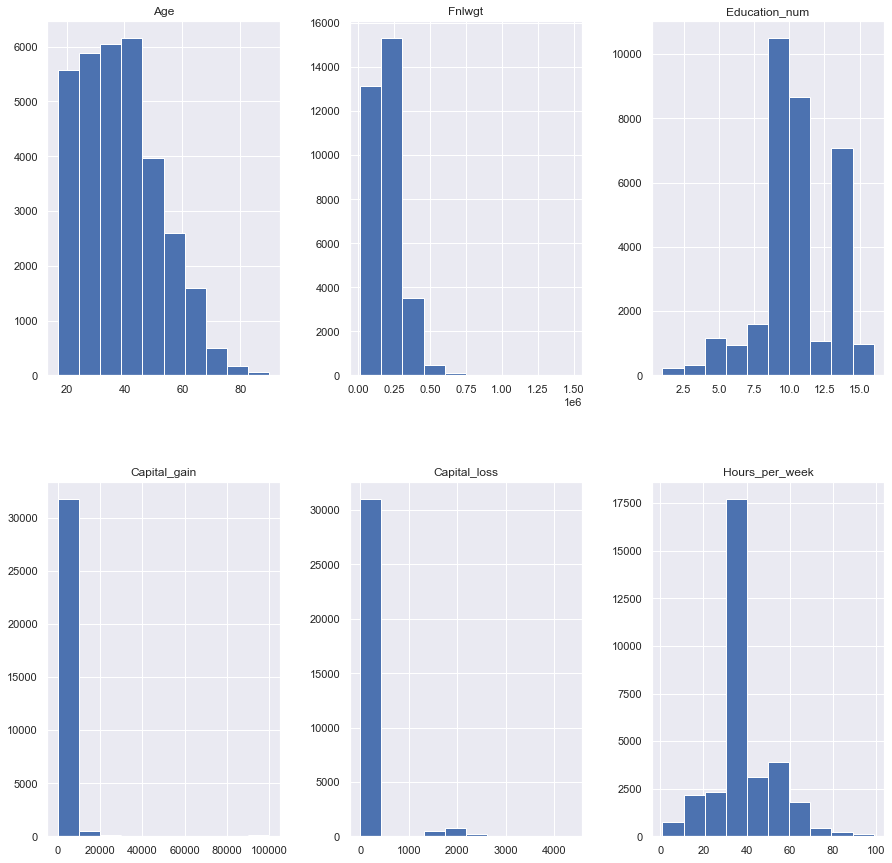

In [31]:
new_df.hist(figsize=(15,15), layout=(2,3), sharex=False)

Age                  AxesSubplot(0.125,0.536818;0.227941x0.343182)
Fnlwgt            AxesSubplot(0.398529,0.536818;0.227941x0.343182)
Education_num     AxesSubplot(0.672059,0.536818;0.227941x0.343182)
Capital_gain            AxesSubplot(0.125,0.125;0.227941x0.343182)
Capital_loss         AxesSubplot(0.398529,0.125;0.227941x0.343182)
Hours_per_week       AxesSubplot(0.672059,0.125;0.227941x0.343182)
dtype: object

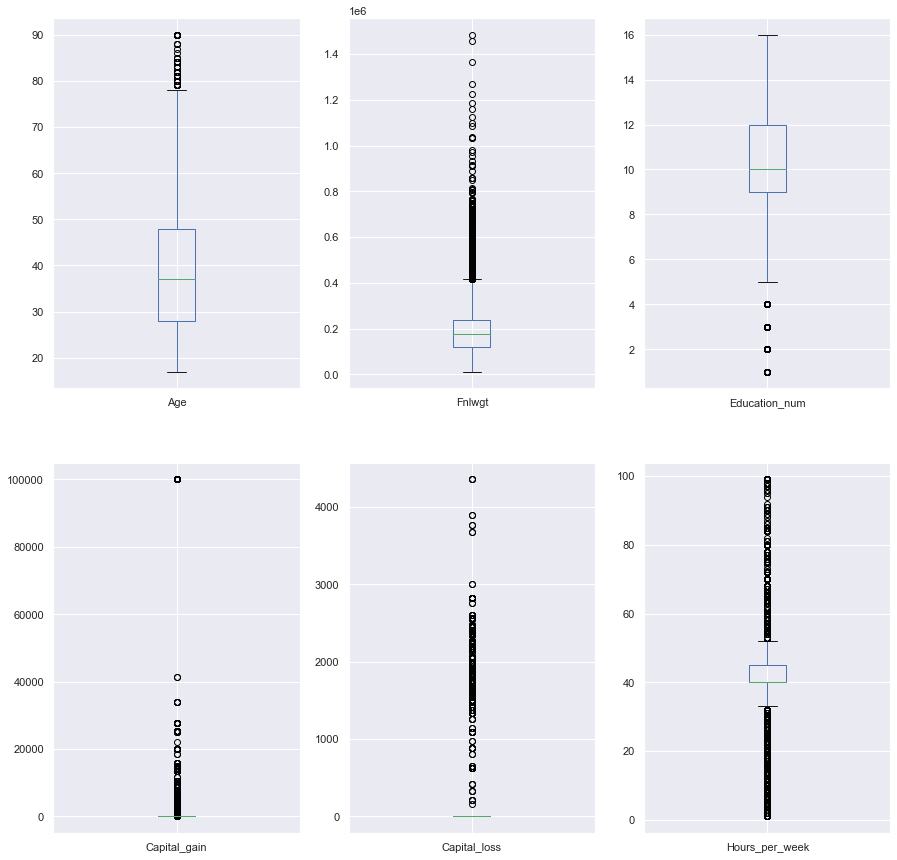

In [32]:
new_df.plot(kind='box',figsize=(15,15), layout=(2,3), sharex=False, subplots=True)

#### Observation: These are some of the columns with extreme Values in it.

In [33]:
px.pie(df, values='Education_num', names='Education',title='% of edu',
      color_discrete_sequence = px.colors.qualitative.T10)

<AxesSubplot:xlabel='Race', ylabel='count'>

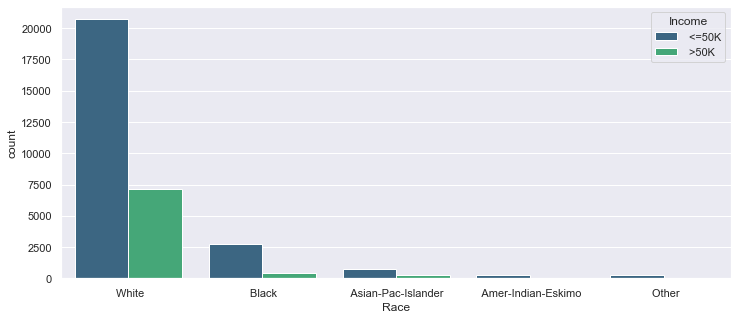

In [34]:
plt.subplots(figsize=(12,5))
sn.countplot(x='Race',hue='Income',data=new_df,palette='viridis')

##### Observation: White race are the ones with both high and low income in numbers

<AxesSubplot:xlabel='Occupation', ylabel='count'>

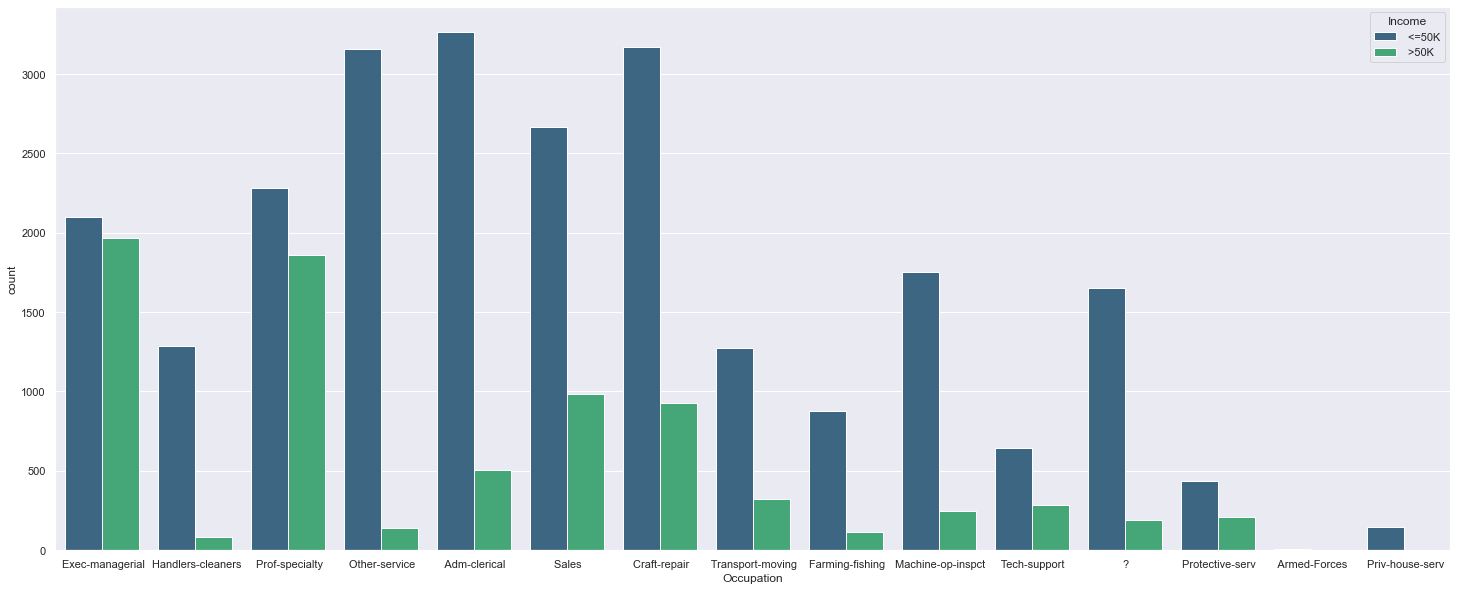

In [35]:
plt.subplots(figsize=(25,10))
sn.countplot(x='Occupation',hue='Income',data=new_df,palette='viridis')

##### Observation: We can see high income in Adm-clerical,Sales,Craft-Repair & Other Services

### Model building

In [36]:
from sklearn.model_selection import cross_val_score, train_test_split
#create x and y variables
X = df.drop(['Income'], axis=1)
y = df['Income']
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state =42)

### Class Imbalancement

In [37]:
y.value_counts()

0    24719
1     7841
Name: Income, dtype: int64

In [38]:
#Performing Sampling to Balance the output data
from imblearn.over_sampling import SMOTE
oversample = SMOTE()##SMOTE(k_neighbours=4) if error  expected k_neighbours
# Transform the dataset
X, y = oversample.fit_resample(X, y)

In [39]:
y.value_counts()

1    24719
0    24719
Name: Income, dtype: int64

### Predicting Income over 50k a year.


In [40]:
#Classify Function
from sklearn.model_selection import cross_val_score, train_test_split
def classify(model, X,y):
    x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state =42)
    
    #Train the Model
    training_start = time.perf_counter()
    model.fit(x_train,y_train)
    training_end = time.perf_counter()
    prediction_start = time.perf_counter()
    preds = model.predict(x_test)
    prediction_end = time.perf_counter()
    acc_model = (preds == y_test).sum().astype(float) / len(preds)*100
    model_train_time = training_end-training_start
    model_prediction_time = prediction_end-prediction_start
    # Cross-validation
    score = cross_val_score(model, X,y, cv=5)
    print("Accuracy:",acc_model)
    print("CV Score:",np.mean(score)*100)
    print("Difference Between Accuracy & CV Score is:",acc_model-np.mean(score)*100)
    print("Time consumed for training: %4.3f" % (model_train_time))
    print("Time consumed for prediction: %6.5f seconds" % (model_prediction_time))

In [41]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
classify(model1,X,y)

Accuracy: 75.80906148867314
CV Score: 73.68623045593196
Difference Between Accuracy & CV Score is: 2.122831032741175
Time consumed for training: 0.659
Time consumed for prediction: 0.00616 seconds


In [42]:
y_prob = model1.predict_proba(x_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
model1.score(x_test, y_pred)

1.0

In [43]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[4613, 1544],
       [ 498, 1485]], dtype=int64)

In [44]:
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc

0.7490469379526199

In [45]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8289794911776901

In [46]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.75      0.82      6157
           1       0.49      0.75      0.59      1983

    accuracy                           0.75      8140
   macro avg       0.70      0.75      0.71      8140
weighted avg       0.80      0.75      0.76      8140



Text(0.5, 0, 'False Positive Rate')

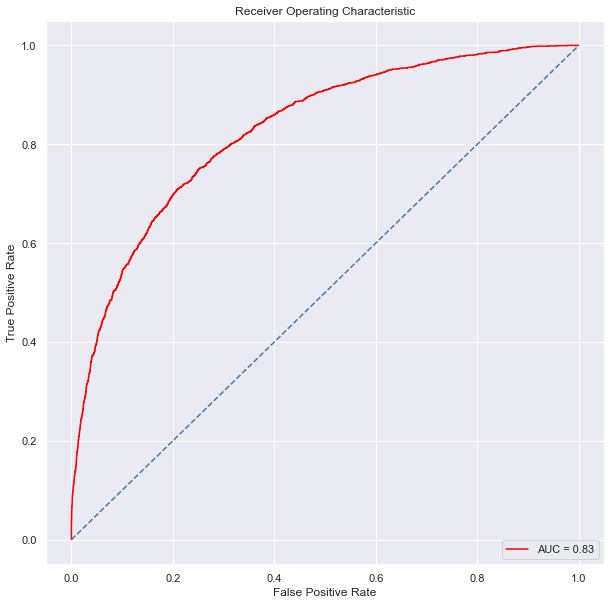

In [47]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [48]:
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier()
classify(model2,X,y)

Accuracy: 84.44174757281553
CV Score: 84.20865284183769
Difference Between Accuracy & CV Score is: 0.2330947309778395
Time consumed for training: 0.312
Time consumed for prediction: 0.00898 seconds


In [49]:
y_prob = model2.predict_proba(x_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
model2.score(x_test, y_pred)

1.0

In [50]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[5783,  374],
       [ 193, 1790]], dtype=int64)

In [51]:
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc

0.9209644246683131

In [52]:
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc

0.9209644246683131

In [53]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9209644246683131

In [54]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95      6157
           1       0.83      0.90      0.86      1983

    accuracy                           0.93      8140
   macro avg       0.90      0.92      0.91      8140
weighted avg       0.93      0.93      0.93      8140



Text(0.5, 0, 'False Positive Rate')

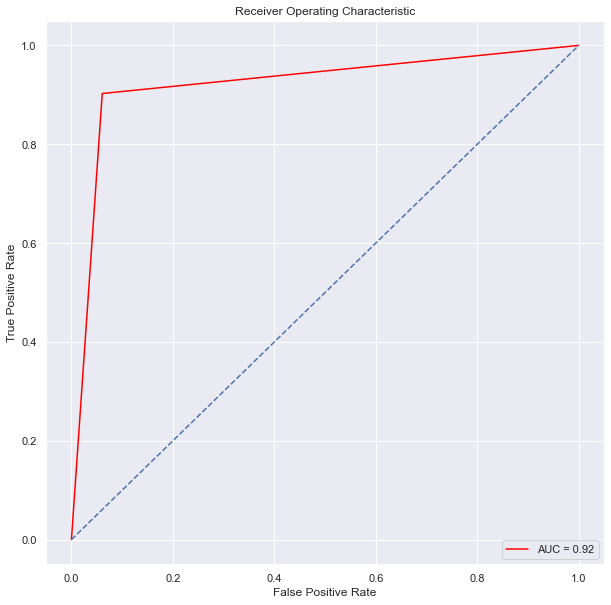

In [55]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [56]:
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier()
classify(model3,X,y)

Accuracy: 88.39805825242718
CV Score: 88.14692350420594
Difference Between Accuracy & CV Score is: 0.25113474822123294
Time consumed for training: 5.109
Time consumed for prediction: 0.38717 seconds


In [57]:
y_prob = model3.predict_proba(x_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
model3.score(x_test, y_pred)

1.0

In [58]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[5857,  300],
       [ 176, 1807]], dtype=int64)

In [59]:
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc

0.9312602795353816

In [60]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9784956685996965

In [61]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      6157
           1       0.86      0.91      0.88      1983

    accuracy                           0.94      8140
   macro avg       0.91      0.93      0.92      8140
weighted avg       0.94      0.94      0.94      8140



Text(0.5, 0, 'False Positive Rate')

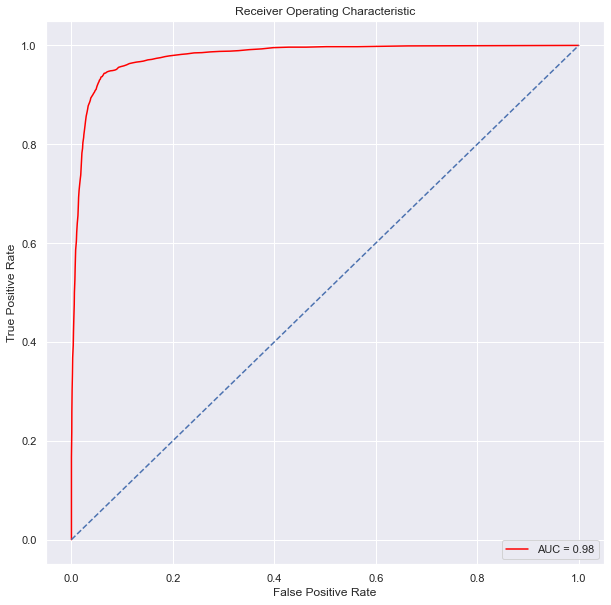

In [62]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [63]:
from sklearn.ensemble import ExtraTreesClassifier
model4 = ExtraTreesClassifier()
classify(model4,X,y)

Accuracy: 88.00161812297735
CV Score: 87.89408135556383
Difference Between Accuracy & CV Score is: 0.1075367674135208
Time consumed for training: 4.005
Time consumed for prediction: 0.50196 seconds


In [64]:
y_prob = model4.predict_proba(x_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
model4.score(x_test, y_pred)

1.0

In [65]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[5849,  308],
       [ 186, 1797]], dtype=int64)

In [66]:
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc

0.928089180316268

In [67]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9864233347429109

In [68]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      6157
           1       0.85      0.91      0.88      1983

    accuracy                           0.94      8140
   macro avg       0.91      0.93      0.92      8140
weighted avg       0.94      0.94      0.94      8140



Text(0.5, 0, 'False Positive Rate')

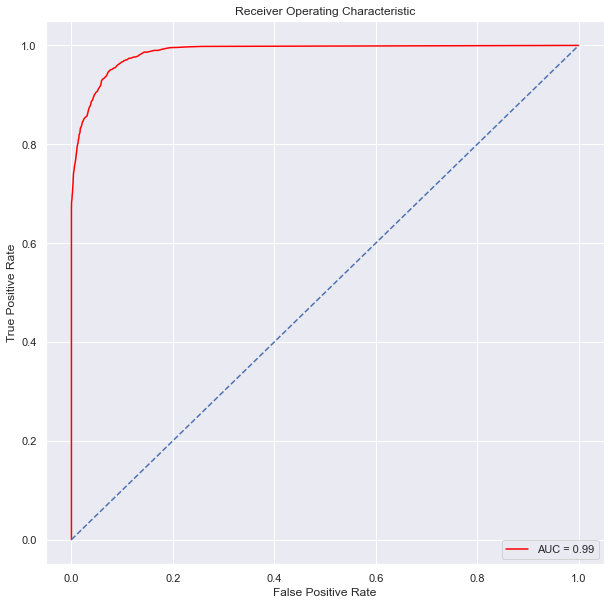

In [69]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

#### From all the above models we Choose ExtraTreesClassifier Model as the (Difference Between Accuracy & CV Score is: 0.107) is most Minimum in ExtraTreesClassifier Model and Auc Value is Highest (Auc:0.9857) Compared to All other Models.

In [70]:
import lightgbm
model5 = lightgbm.LGBMClassifier()
classify(model5,X,y)

Accuracy: 88.6084142394822
CV Score: 87.99117159828391
Difference Between Accuracy & CV Score is: 0.6172426411982883
Time consumed for training: 0.419
Time consumed for prediction: 0.06086 seconds


In [71]:
y_prob = model5.predict_proba(x_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
model5.score(x_test, y_pred)

1.0

In [72]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[5482,  675],
       [ 453, 1530]], dtype=int64)

In [73]:
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc

0.8309634655658037

In [74]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9278215571352764

In [75]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91      6157
           1       0.69      0.77      0.73      1983

    accuracy                           0.86      8140
   macro avg       0.81      0.83      0.82      8140
weighted avg       0.87      0.86      0.86      8140



Text(0.5, 0, 'False Positive Rate')

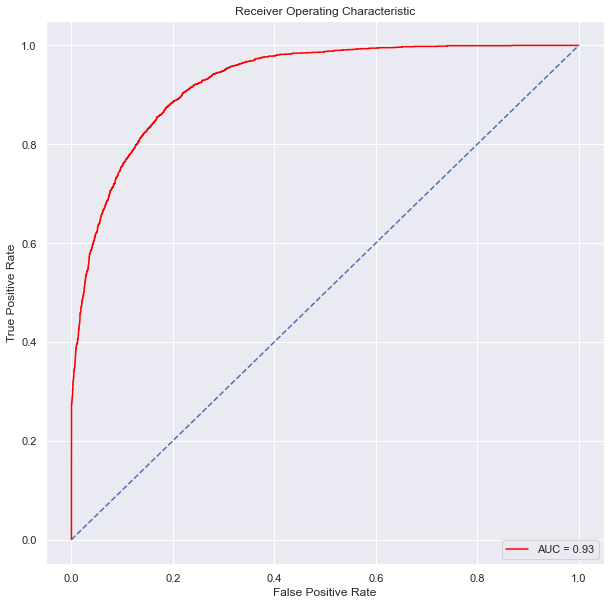

In [76]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [77]:
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import ExtraTreesClassifier as Classifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline

In [78]:
target = 'Income'
cols_to_drop = ["Fnlwgt", "Education_num"]

In [79]:
preprocessor = ColumnTransformer(
    remainder='passthrough',                  # keep all columns
    transformers=[
        ('drop', 'drop', cols_to_drop),       # except these
        # Could possibly use `FunctionTransformer` (as many as needed ) for feature engineering
    ])

In [80]:
model = Classifier(n_jobs=-1, random_state=0)
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])

In [81]:
train = df
X, y = train.drop([target], axis=1), train[target]

In [82]:
cv = StratifiedKFold(n_splits=3, random_state=0,shuffle=True)
param_grid = {
    "model__random_state": [0],   # [0, 1, 2, 3, 4],
    "model__n_estimators": [360], # [320, 340, 360, 380, 400],
    "model__max_depth": [32]      # [25, 30, 32, 34, 38, 45]
}

searchCV = GridSearchCV(estimator=pipeline, scoring='accuracy', cv=cv, param_grid=param_grid, verbose=True)

# WARNING: This could take some time to run.

searchCV.fit(X, y)

print('Best index:', searchCV.best_index_)
print('Best score:', searchCV.best_score_)
print('Best params:', searchCV.best_params_)


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best index: 0
Best score: 0.8471746091218066
Best params: {'model__max_depth': 32, 'model__n_estimators': 360, 'model__random_state': 0}


In [83]:
import pickle
  
# Save the trained model as a pickle string.
FinalModel = pickle.dumps(searchCV)
  
# Load the pickled model
Final_mod_from_pickle = pickle.loads(FinalModel)
  
# Use the loaded pickled model to make predictions
df['Predicted_Income'] = Final_mod_from_pickle.predict(X)

In [84]:
df['Predicted_Income']

0        0
1        0
2        0
3        0
4        0
        ..
32555    0
32556    0
32557    0
32558    0
32559    1
Name: Predicted_Income, Length: 32560, dtype: int32

In [85]:
# Building the model
extra_tree_forest = ExtraTreesClassifier(n_estimators = 5,
                                        criterion ='entropy', max_features = 2)
  
# Training the model
extra_tree_forest.fit(X, y)
  
# Computing the importance of each feature
feature_importance = extra_tree_forest.feature_importances_
  
# Normalizing the individual importances
feature_importance_normalized = np.std([tree.feature_importances_ for tree in 
                                        extra_tree_forest.estimators_],
                                        axis = 0)


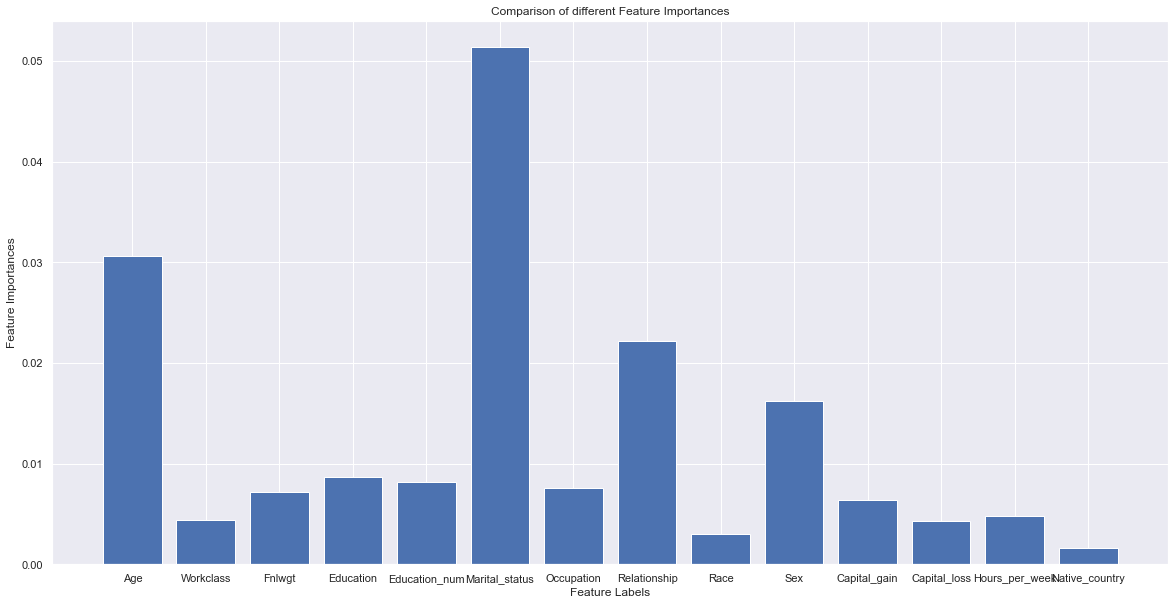

In [86]:
# Plotting a Bar Graph to compare the models
plt.figure(figsize=(20,10))
plt.bar(X.columns, feature_importance_normalized,orientation = 'vertical')
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')
plt.title('Comparison of different Feature Importances')
plt.show()

Observation:A future aim may be to cut the less relevant features (lets say we can drop Race,Native_Country,Capital_loss in terms of importance),
estimate a new model and compare it with the old ones.
I reckon it would lose predictive power, but on the other hand it would improve in terms of training speed.

###### In conclusion, these are my final considerations on the model:

* The best feature to reliably predict the Income Status are Martial_Status & Relation_ship in income census.
* The features such as Age,Sex,Education and Capital_gain are respectively on 3rd, 4th,5th & 6th in this ranking. Native_country is the Least relevant feature in this cluster.